In [1]:
import pandas as pd

df = pd.read_csv('acs2017_county_data.csv')
print("tamaño de los datos: ",df.shape)
df.head()

tamaño de los datos:  (3220, 37)


,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [2]:
df.isna().sum()
df.isnull().sum()
#La data no tiene registros nulos ni perdidos relevantes, salvo uno para la variable 
#'ChildPoverty'

CountyId            0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        1
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

In [3]:
#Se crean nuevas variables relacionales y de proporción, se retira 'CountId' 
#por no ser relevante y se imputa el único dato perdido de 'ChildPoverty' con la media.

df['Pob_Empleada']=df['Employed']/df['TotalPop']
df['Pob_Hombre']=df['Men']/df['TotalPop']
df['Pob_Mujer']=df['Women']/df['TotalPop']
df['Pob_Voting']=df['VotingAgeCitizen']/df['TotalPop']
df['Pob_DifWhite']=df['Black']+df['Native']+df['Pacific']+df['Hispanic']+df['Asian']
df=df.drop('CountyId', axis=1)
mean_chpov = df['ChildPoverty'].mean()
df['ChildPoverty'].fillna(mean_chpov, inplace=True)

In [4]:
df.info()
df.head()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             3220 non-null   object 
 1   County            3220 non-null   object 
 2   TotalPop          3220 non-null   int64  
 3   Men               3220 non-null   int64  
 4   Women             3220 non-null   int64  
 5   Hispanic          3220 non-null   float64
 6   White             3220 non-null   float64
 7   Black             3220 non-null   float64
 8   Native            3220 non-null   float64
 9   Asian             3220 non-null   float64
 10  Pacific           3220 non-null   float64
 11  VotingAgeCitizen  3220 non-null   int64  
 12  Income            3220 non-null   int64  
 13  IncomeErr         3220 non-null   int64  
 14  IncomePerCap      3220 non-null   int64  
 15  IncomePerCapErr   3220 non-null   int64  
 16  Poverty           3220 non-null   float64


Index(['State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'Pob_Empleada',
       'Pob_Hombre', 'Pob_Mujer', 'Pob_Voting', 'Pob_DifWhite'],
      dtype='object')

## Análisis gráfico de la información

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


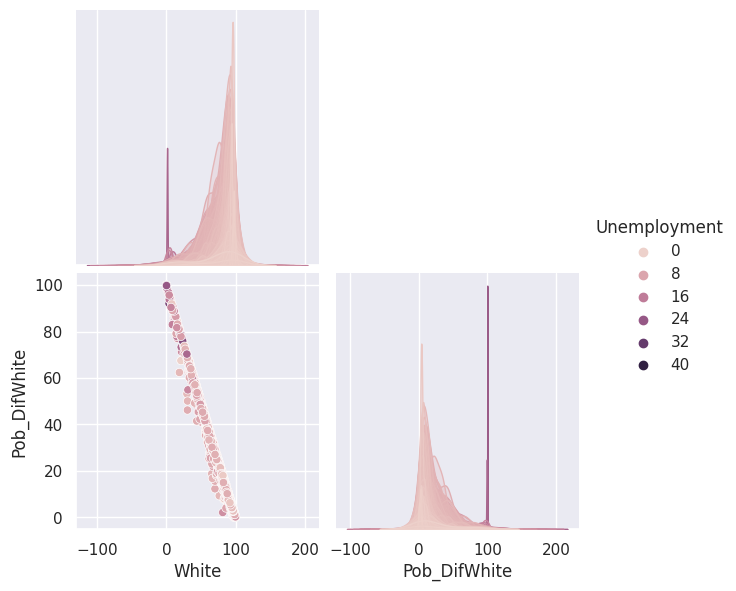

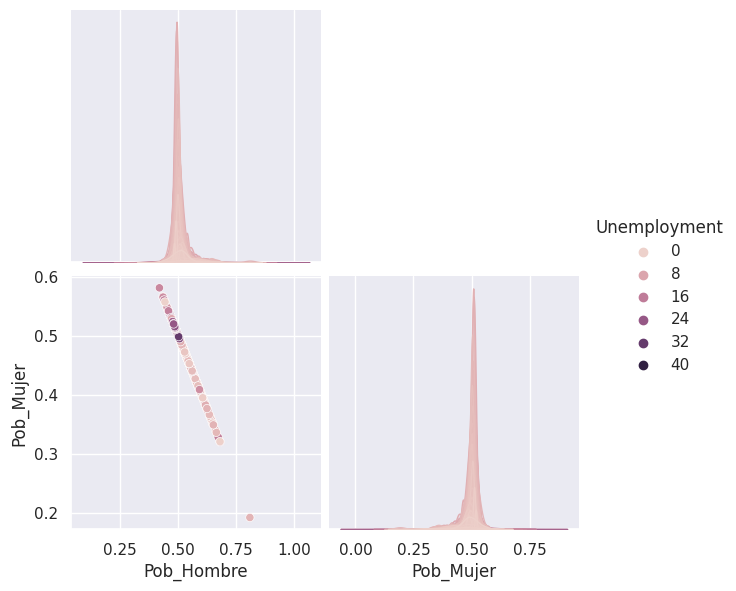

In [5]:
#Se crean gráficos de visualización con seaborn, principalmente para validar el impacto que tiene 
#la raza sobre el nivel de pobreza

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
#sns.pairplot(data=df, hue= 'Unemployment',vars=['Native','Asian','Black','White','Pacific'])
sns.pairplot(data=df, hue= 'Unemployment',vars=['White','Pob_DifWhite'],corner=True,size=3,kind="scatter")
sns.pairplot(data=df, hue= 'Unemployment',vars=['Pob_Hombre','Pob_Mujer'],corner=True,size=3,kind="scatter")
plt.show()

#De acuerdo al gráfico, puede haber una mayor prevalencia en la tasa de desempleo para la
#las minorías (población con mayoría negra, hispana, asiática, nativa) que en la población blanca.

#Otra conclusión del segundo gráfico muestra que hay una mayor prevalencia en el desempleo en mujeres
#que en hombres.

In [6]:
#Se crea un reporte de las variables de la data con sweetviz

import sweetviz as sv
informe=sv.analyze(df)
informe.show_html('InformeCenso.html')

                                             |      | [  0%]   00:00 -> (? left)

Report InformeCenso.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


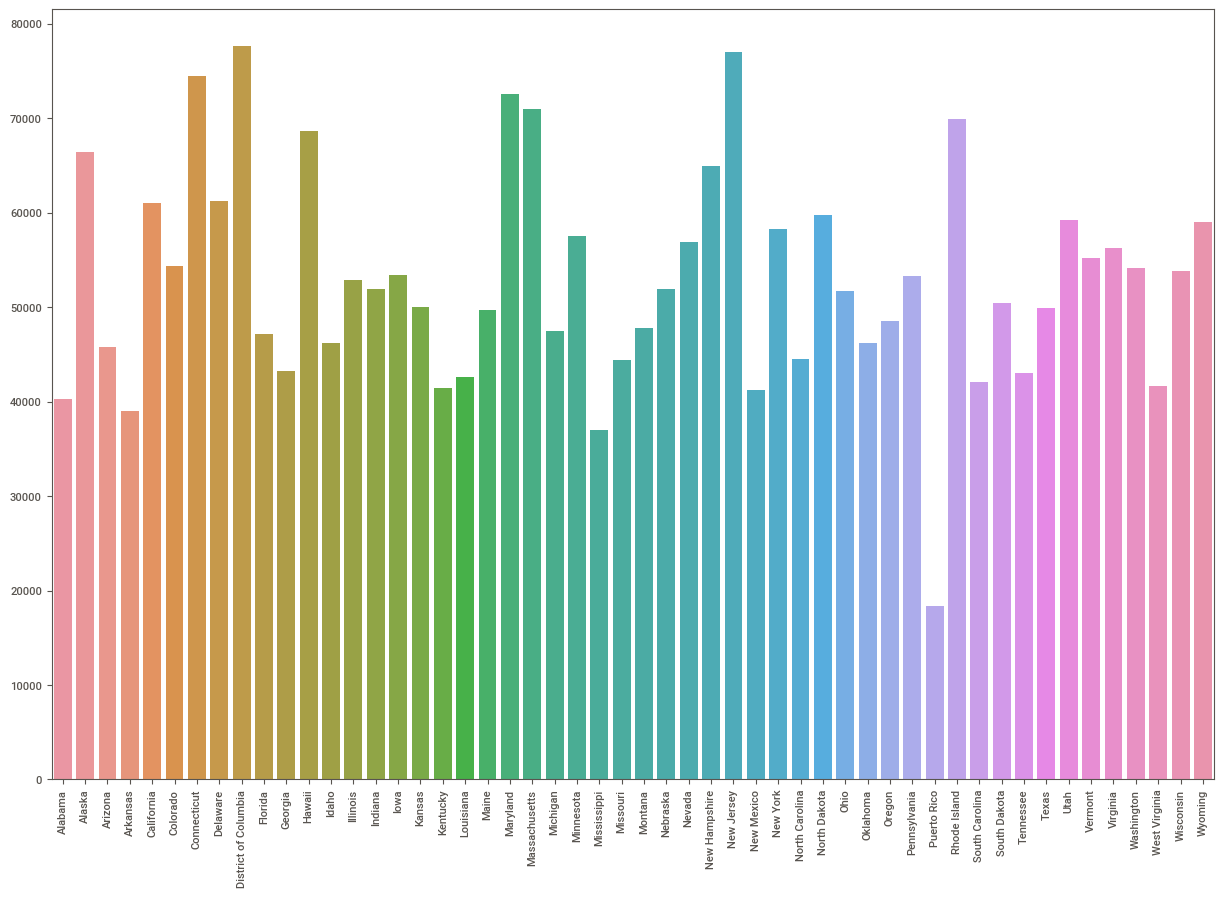

In [7]:
grupo=df.groupby(['State'],as_index=False)['Income'].mean()
ax = plt.subplots(figsize = (15, 10))
ax = sns.barplot(x=grupo['State'].values, y=grupo['Income'].values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


In [8]:
#Gráficos de boxplot para revisar outliers

#for i in x:
    #plt.figure()
    #plt.tight_layout()
    #plt.subplots(figsize = (2,2))
    #plt.gca().set(xlabel= i,ylabel='Frequency')
    #plt.boxplot(x[i]) 
    #plt.show()

## Regresión Lineal Múltiple

In [9]:
#Se crea un modelo de Regresión Lineal Multiples cuyo objetivo es pronosticar el ingreso
#de los condados de Estados Unidos de acuerdo a una serie de variables.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import numpy as np

x=df[['TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen','ChildPoverty','Poverty', 
       'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'Pob_Empleada',
       'Pob_Hombre', 'Pob_Mujer', 'Pob_Voting','Pob_DifWhite']]
y=df[['Income']]

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20, random_state=0)

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.25, random_state=0)


x_train.shape, x_test.shape,x_validate.shape, y_train.shape, y_test.shape,y_validate.shape

modelLR = LinearRegression()

modelLR.fit(x_train,y_train)

y_pred=modelLR.predict(x_validate)

from sklearn.metrics import r2_score, mean_squared_error

r_squared = r2_score(y_validate, y_pred)
rsme=mean_squared_error(y_validate, y_pred, squared=False)
mae=mean_absolute_error(y_validate,y_pred)

print("R-squared:", r_squared)
print("RSME:", rsme)
print("MAE:", mae)


R-squared: 0.8429464404929465
RSME: 5511.7014815661705
MAE: 3814.897015305803


In [10]:
print("Promedio Ingresos Modelo: ",y_pred.mean())
print("Promedio Ingresos Data Original: ",df['Income'].mean())

Promedio Ingresos Modelo:  48979.29683342164
Promedio Ingresos Data Original:  48994.966770186336


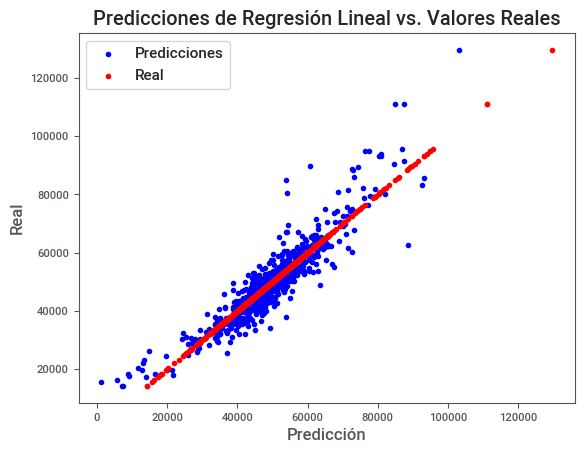

In [11]:
# Grafica los valores predichos
plt.scatter(y_pred, y_validate, color='blue', label='Predicciones')

# Grafica valores reales
plt.scatter(y_validate, y_validate, color='red', label='Real')


# Añade rótulos
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Predicciones de Regresión Lineal vs. Valores Reales')
plt.legend()

# Muestra la gráfica
plt.show()

## Regresión Polinómica Múltiple

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lr=LinearRegression()
poly = PolynomialFeatures(degree=2,include_bias=False)

X_poly = poly.fit_transform(x_train)
X_polyvalidate = poly.fit_transform(x_validate)


lr.fit(X_poly, y_train)
y_pred2=lr.predict(X_polyvalidate)



from sklearn.metrics import r2_score, mean_squared_error

r_squared2 = r2_score(y_validate, y_pred2)
rsme2=mean_squared_error(y_validate, y_pred2, squared=False)
mae2=mean_absolute_error(y_validate,y_pred2)

print("R-squared:", r_squared2)
print("RSME:", rsme2)
print("MAE:", mae2)


R-squared: 0.6542737800291196
RSME: 8177.63937581459
MAE: 4452.581395706941


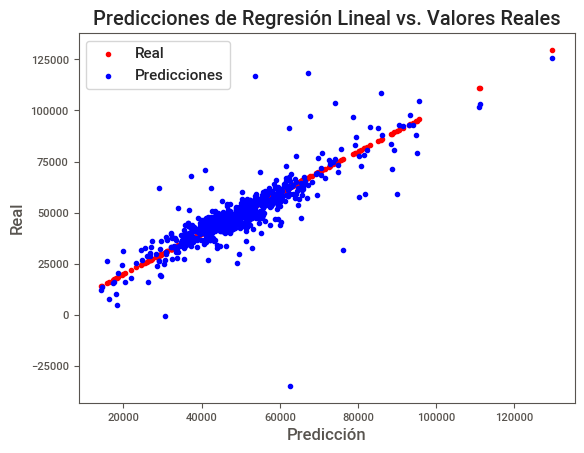

In [13]:

# Grafica valores reales
plt.scatter(y_validate, y_validate, color='red', label='Real')

#Grafica los valores predichos por el modelo polinomico
plt.scatter(y_validate, y_pred2, color='blue', label='Predicciones')

# Añade rótulos
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Predicciones de Regresión Lineal vs. Valores Reales')
plt.legend()

# Muestra la gráfica
plt.show()

## Arbol de Decisión Regresor

In [14]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=5,random_state=42)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_validate)

r2 = r2_score(y_validate, y_pred)
rmse = mean_squared_error(y_validate, y_pred,squared=False)
mae=mean_absolute_error(y_validate,y_pred)
print("R2: ",r2)
print("RMSE:", rmse)
print("MAE:", mae)

R2:  0.7453068473922524
RMSE: 7018.922230291503
MAE: 5005.40311828498


##### Gráfico del Arbol de Decisión Regresor

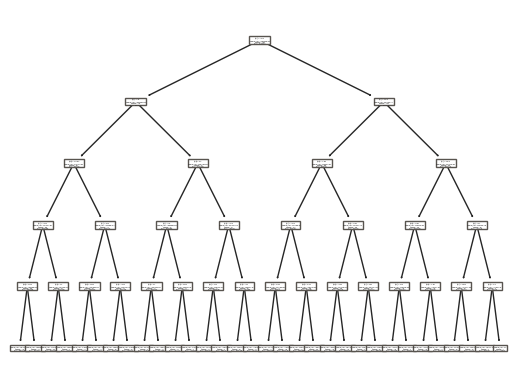

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(regressor)
plt.show()

#### Optimización Arbol de Decisión

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

max_depth = []
acc_mae = []
for i in range(1,31):
 dtree = DecisionTreeRegressor(max_depth=i,random_state=42)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_validate)
 acc_mae.append(mean_absolute_error(y_validate,pred))
 max_depth.append(i)

        acc_mae  max_depth
0   7679.779982          1
1   6404.919943          2
2   5758.130493          3
3   5141.930345          4
4   5005.403118          5
5   4731.972210          6
6   4490.497155          7
7   4468.378020          8
8   4462.226187          9
9   4538.270390         10
10  4761.406944         11
11  4791.913976         12
12  4775.063631         13
13  4764.868592         14
14  4782.386649         15
15  4774.973720         16
16  4916.205984         17
17  4855.085356         18
18  4912.374984         19
19  4885.067227         20
20  4882.557492         21
21  4899.024845         22
22  4864.158385         23
23  4949.404503         24
24  4951.196429         25
25  4859.440994         26
26  4859.440994         27
27  4859.440994         28
28  4859.440994         29
29  4859.440994         30


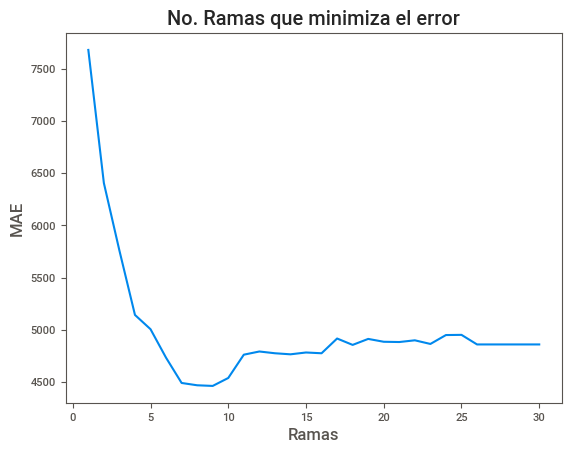

In [17]:
import matplotlib.pyplot as plt

dataf = pd.DataFrame({'acc_mae':pd.Series(acc_mae),'max_depth':pd.Series(max_depth)})
print(dataf)
plt.plot('max_depth','acc_mae', data=dataf, label='gini')
plt.xlabel('Ramas')
plt.ylabel('MAE')
plt.title('No. Ramas que minimiza el error')
plt.show()


##### La gráfica anterior muestra menor MAE al dejar un arbol de 9 ramas

### Árbol de Decisión Optimizado 9 ramas

In [18]:
regressor_opt = DecisionTreeRegressor(max_depth=9,random_state=42)
regressor_opt.fit(x_train, y_train)

y_pred_opt = regressor_opt.predict(x_validate)
r2 = r2_score(y_validate, y_pred)
rmse = mean_squared_error(y_validate, y_pred_opt,squared=False)
mae=mean_absolute_error(y_validate,y_pred_opt)
print("R2:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

R2: 0.7453068473922524
RMSE: 6460.047382579651
MAE: 4462.226187419964


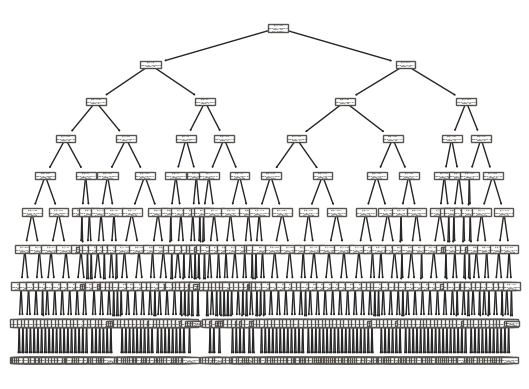

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(regressor_opt)
plt.show()

##### El arbol de decisión optimizado con 8 ramas, muestra un menor MAE que el arbol sin optimizar y recortado a 5 ramas.

## XGBoost Regresión

In [20]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_validate, label=y_validate)

# Definimos los parámetros del modelo
params = {
    'max_depth': 5,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'mae'
}

# Entrenamiento del modelo
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Predicción del modelo
y_predxgb = model.predict(dtest)

# Evaluación de errores
r2xgb = r2_score(y_validate, y_predxgb)
rmse = mean_squared_error(y_validate, y_predxgb, squared=False)
mae=mean_absolute_error(y_validate,y_predxgb)
print("R2: %.2f" % r2xgb)
print("RMSE: %.2f" % rmse)
print("MAE:", mae)


R2: 0.88
RMSE: 4884.49
MAE: 3382.556954520089


### Optimización XGBoost (Resultado 5 Ramas)

In [21]:
import xgboost as xgb

dtrain2 = xgb.DMatrix(x_train, label=y_train)
dtest2 = xgb.DMatrix(x_validate, label=y_validate)

max_depth2 = []
acc_mae2 = []
num_rounds = 100

for i in range(1,31):
  params = {
    'max_depth': i,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'mae'
  }
  
  model2 = xgb.train(params, dtrain2, num_rounds)
  predxgb = model2.predict(dtest2)
  acc_mae2.append(mean_absolute_error(y_validate,predxgb))
  max_depth2.append(i)

     acc_maexgb  max_depthxgb
0   4136.624366             1
1   3530.531656             2
2   3432.271917             3
3   3453.142534             4
4   3382.556955             5
5   3389.190011             6
6   3419.879681             7
7   3417.979309             8
8   3390.847834             9
9   3442.459744            10
10  3455.099553            11
11  3420.587263            12
12  3411.575782            13
13  3416.924661            14
14  3445.040163            15
15  3446.082841            16
16  3450.913222            17
17  3446.788397            18
18  3465.215691            19
19  3479.408020            20
20  3467.142108            21
21  3465.267187            22
22  3475.737173            23
23  3441.763149            24
24  3456.113186            25
25  3462.468758            26
26  3478.936284            27
27  3478.013717            28
28  3481.366817            29
29  3482.682849            30


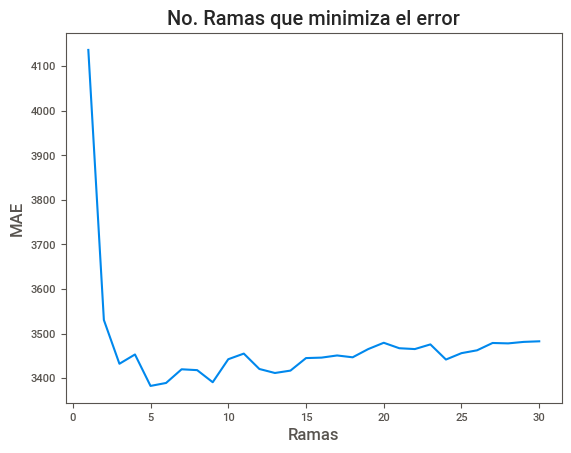

In [22]:
import matplotlib.pyplot as plt

dataxgb = pd.DataFrame({'acc_maexgb':pd.Series(acc_mae2),'max_depthxgb':pd.Series(max_depth2)})
print(dataxgb)
plt.plot('max_depthxgb','acc_maexgb', data=dataxgb, label='gini')
plt.xlabel('Ramas')
plt.ylabel('MAE')
plt.title('No. Ramas que minimiza el error')
plt.show()

## CLUSTERIZACIÓN

In [23]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot  as plt

In [24]:
xy=df[['TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen','ChildPoverty','Poverty', 
       'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'Pob_Empleada',
       'Pob_Hombre', 'Pob_Mujer', 'Pob_Voting','Pob_DifWhite','Income']]

xy.head()
xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TotalPop          3220 non-null   int64  
 1   Men               3220 non-null   int64  
 2   Women             3220 non-null   int64  
 3   Hispanic          3220 non-null   float64
 4   White             3220 non-null   float64
 5   Black             3220 non-null   float64
 6   Native            3220 non-null   float64
 7   Asian             3220 non-null   float64
 8   Pacific           3220 non-null   float64
 9   VotingAgeCitizen  3220 non-null   int64  
 10  ChildPoverty      3220 non-null   float64
 11  Poverty           3220 non-null   float64
 12  Professional      3220 non-null   float64
 13  Service           3220 non-null   float64
 14  Office            3220 non-null   float64
 15  Construction      3220 non-null   float64
 16  Production        3220 non-null   float64


### Se busca el número óptimo de clusters, con el método de codo o Elbow.

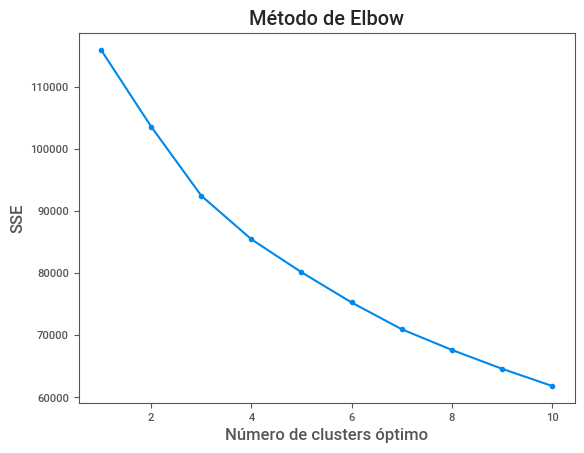

In [25]:
from sklearn.preprocessing import StandardScaler

escala=StandardScaler()
xscaled=escala.fit_transform(xy)

clusteropt = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,n_init=20)
    kmeans.fit(xscaled)
    clusteropt.append(kmeans.inertia_)

plt.plot(range(1,11), clusteropt, marker='o')
plt.title('Método de Elbow')
plt.xlabel('Número de clusters óptimo')
plt.ylabel('SSE') #Sum of squared error SSE
plt.show()


##### De acuerdo al gráfico el número de cluster óptimo es 3.

### Kmeans con cluster (3) definido por el método del codo

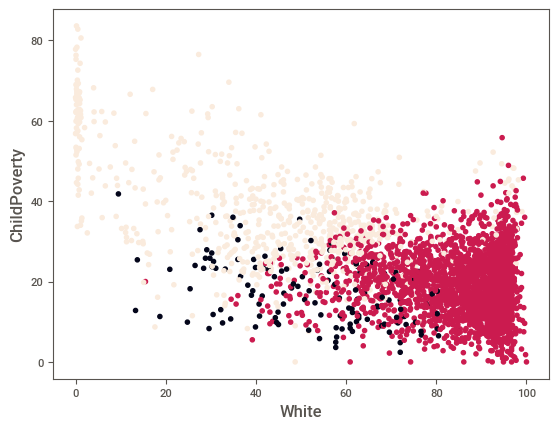

In [26]:
KM=KMeans(n_clusters=3,n_init=20)
KM.fit(xscaled)
labels=KM.labels_
centroids = KM.cluster_centers_

plt.scatter(df['White'],df['ChildPoverty'], c=labels)
plt.xlabel('White')
plt.ylabel('ChildPoverty')

plt.show()



##### Pese a que el método elbow muestra 3 cluster óptimos, al graficarlos, no es tan evidente su separación, por lo cual se decide dejar 2 cluster.

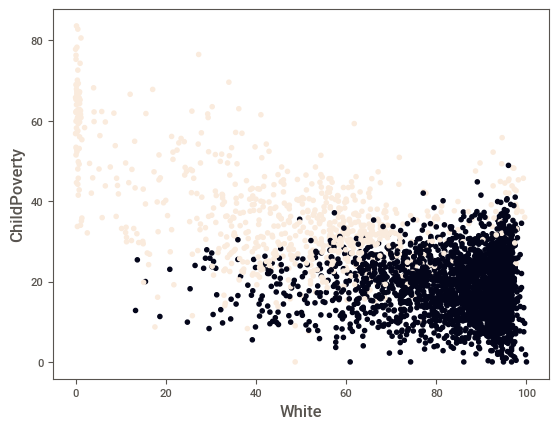

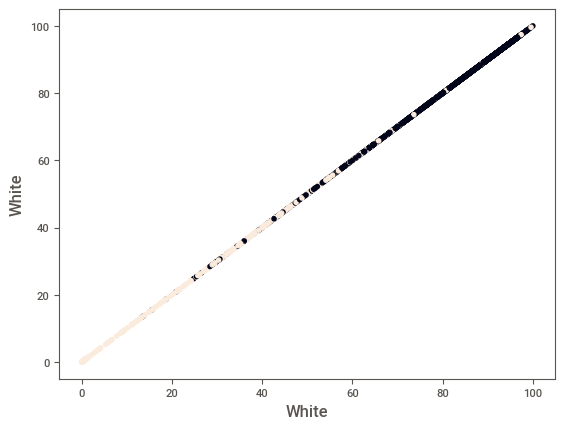

In [27]:
KM=KMeans(n_clusters=2,n_init=20)
KM.fit(xscaled)
labels=KM.labels_
centroids = KM.cluster_centers_

plt.scatter(df['White'],df['ChildPoverty'], c=labels)
plt.xlabel('White')
plt.ylabel('ChildPoverty')
plt.show()


plt.scatter(df['White'],df['White'], c=labels)
plt.xlabel('White')
plt.ylabel('White')
plt.show()


##### La gráfica anterior identifica los dos cluster principales y la característica principal que los diferencia con facilidad. El primer cluster (0) tiene una menor población blanca (<50%) y el segundo cluster (1) tiene una mayor proporción de población blanca (>50%)

In [28]:
#Agrega el cluster a la base original

df['Cluster']=labels
df.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,PublicWork,SelfEmployed,FamilyWork,Unemployment,Pob_Empleada,Pob_Hombre,Pob_Mujer,Pob_Voting,Pob_DifWhite,Cluster
0,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,...,20.2,5.6,0.1,5.2,0.438113,0.488753,0.511247,0.745258,22.8,0
1,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,...,12.9,6.3,0.1,5.5,0.440239,0.489413,0.510587,0.764044,15.4,0
2,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,...,19.1,6.5,0.3,12.4,0.338842,0.533415,0.466585,0.773596,52.8,1
3,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,...,17.4,6.3,0.3,8.2,0.361869,0.542560,0.457440,0.782197,24.8,1
4,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,...,11.9,4.0,0.1,4.9,0.370749,0.494043,0.505957,0.737215,10.9,0


In [29]:
#Agrega el cluster a la base de variables cuantitativas. 
xy['Cluster']=labels
xy.head()

/tmp/ipykernel_7080/3778543096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xy['Cluster']=labels


,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,SelfEmployed,FamilyWork,Unemployment,Pob_Empleada,Pob_Hombre,Pob_Mujer,Pob_Voting,Pob_DifWhite,Income,Cluster
0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,...,5.6,0.1,5.2,0.438113,0.488753,0.511247,0.745258,22.8,55317,0
1,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,...,6.3,0.1,5.5,0.440239,0.489413,0.510587,0.764044,15.4,52562,0
2,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,...,6.5,0.3,12.4,0.338842,0.533415,0.466585,0.773596,52.8,33368,1
3,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,...,6.3,0.3,8.2,0.361869,0.542560,0.457440,0.782197,24.8,43404,1
4,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,...,4.0,0.1,4.9,0.370749,0.494043,0.505957,0.737215,10.9,47412,0


### Grafica las distribución de las variables en función de los cluster


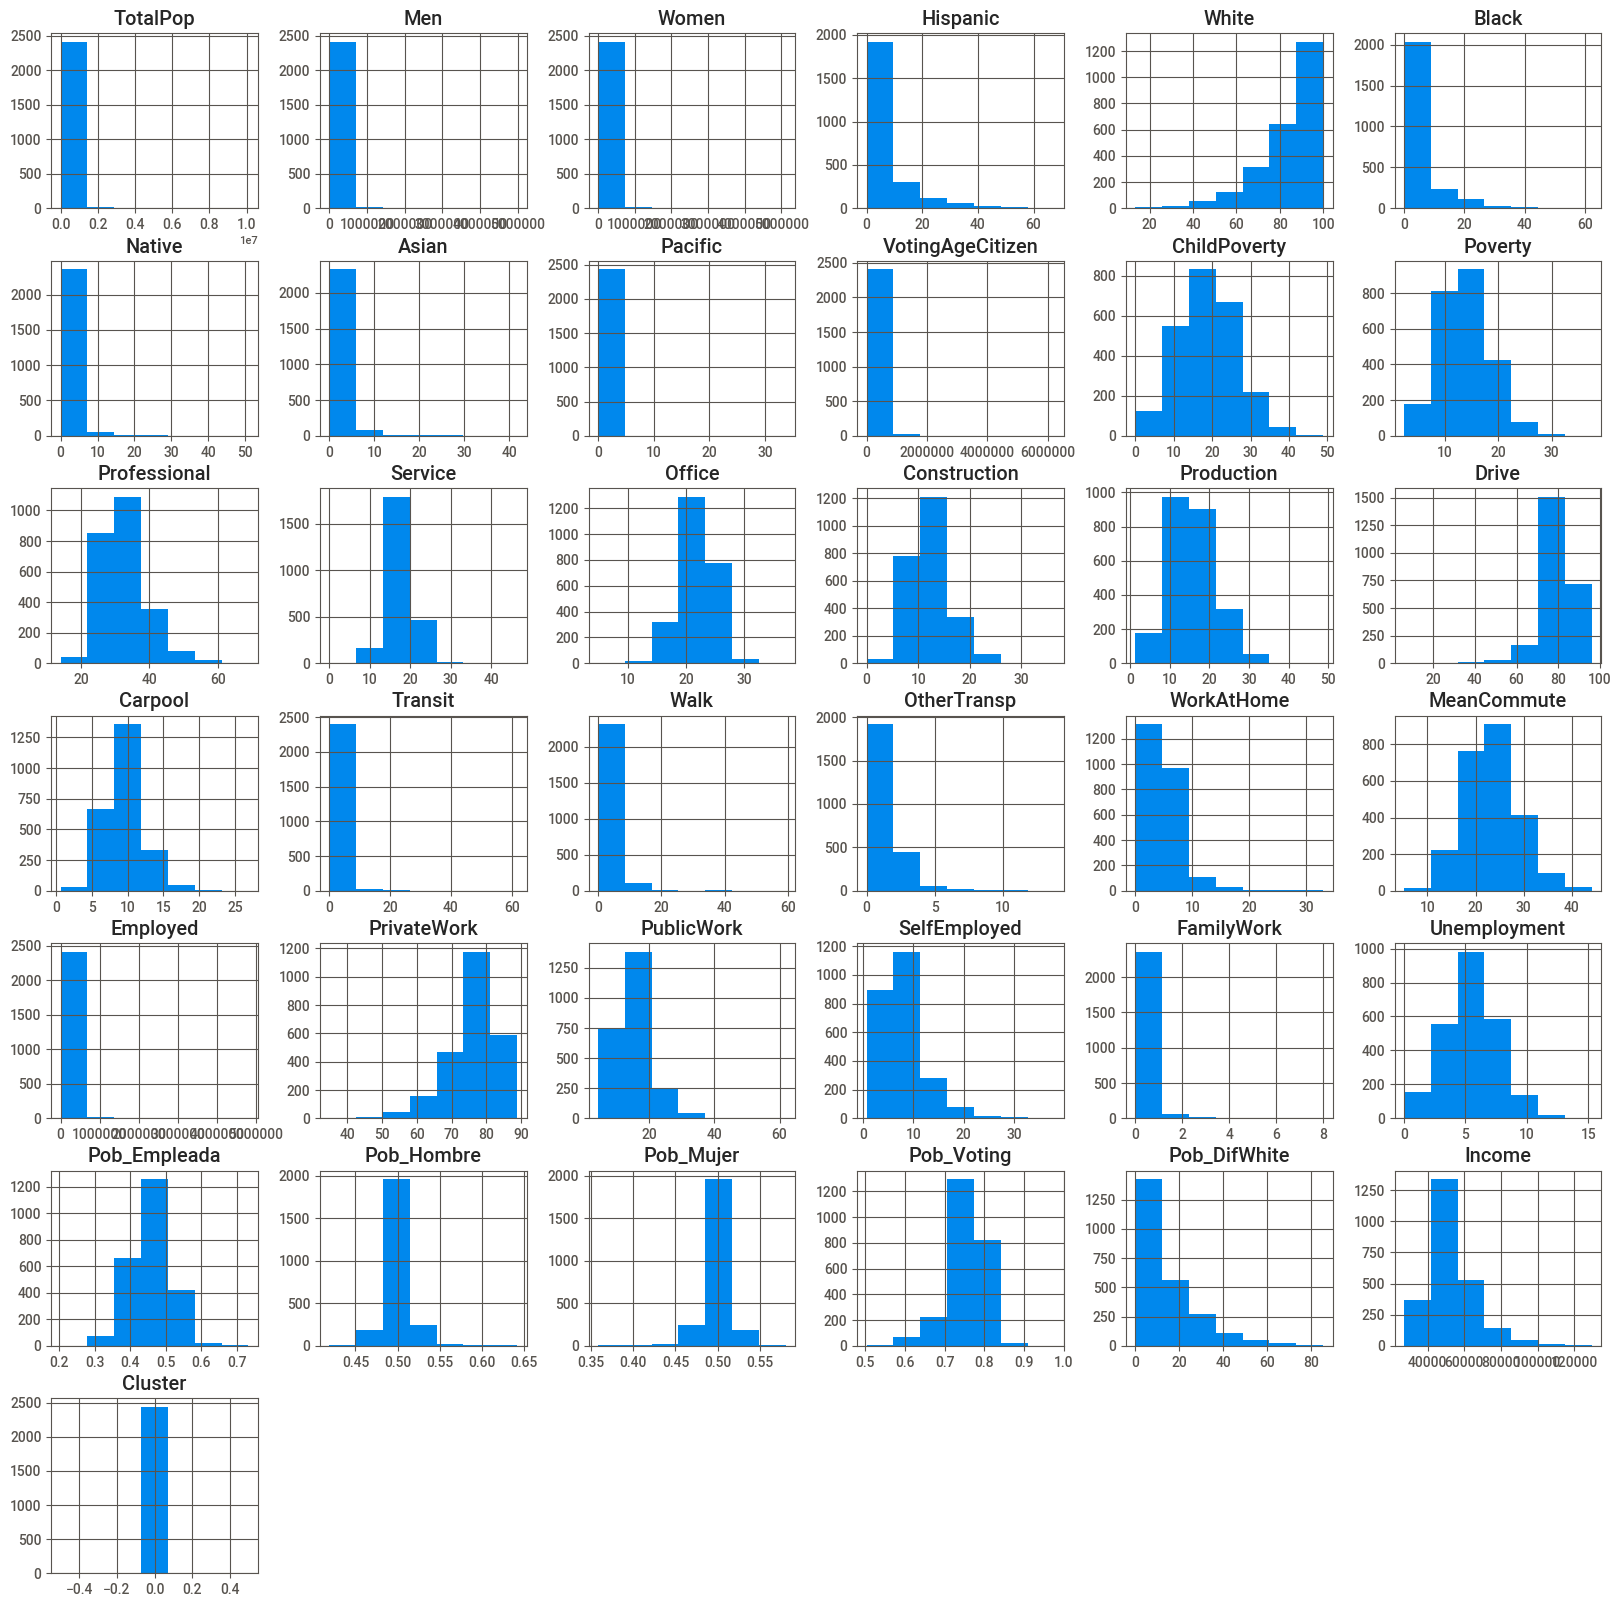

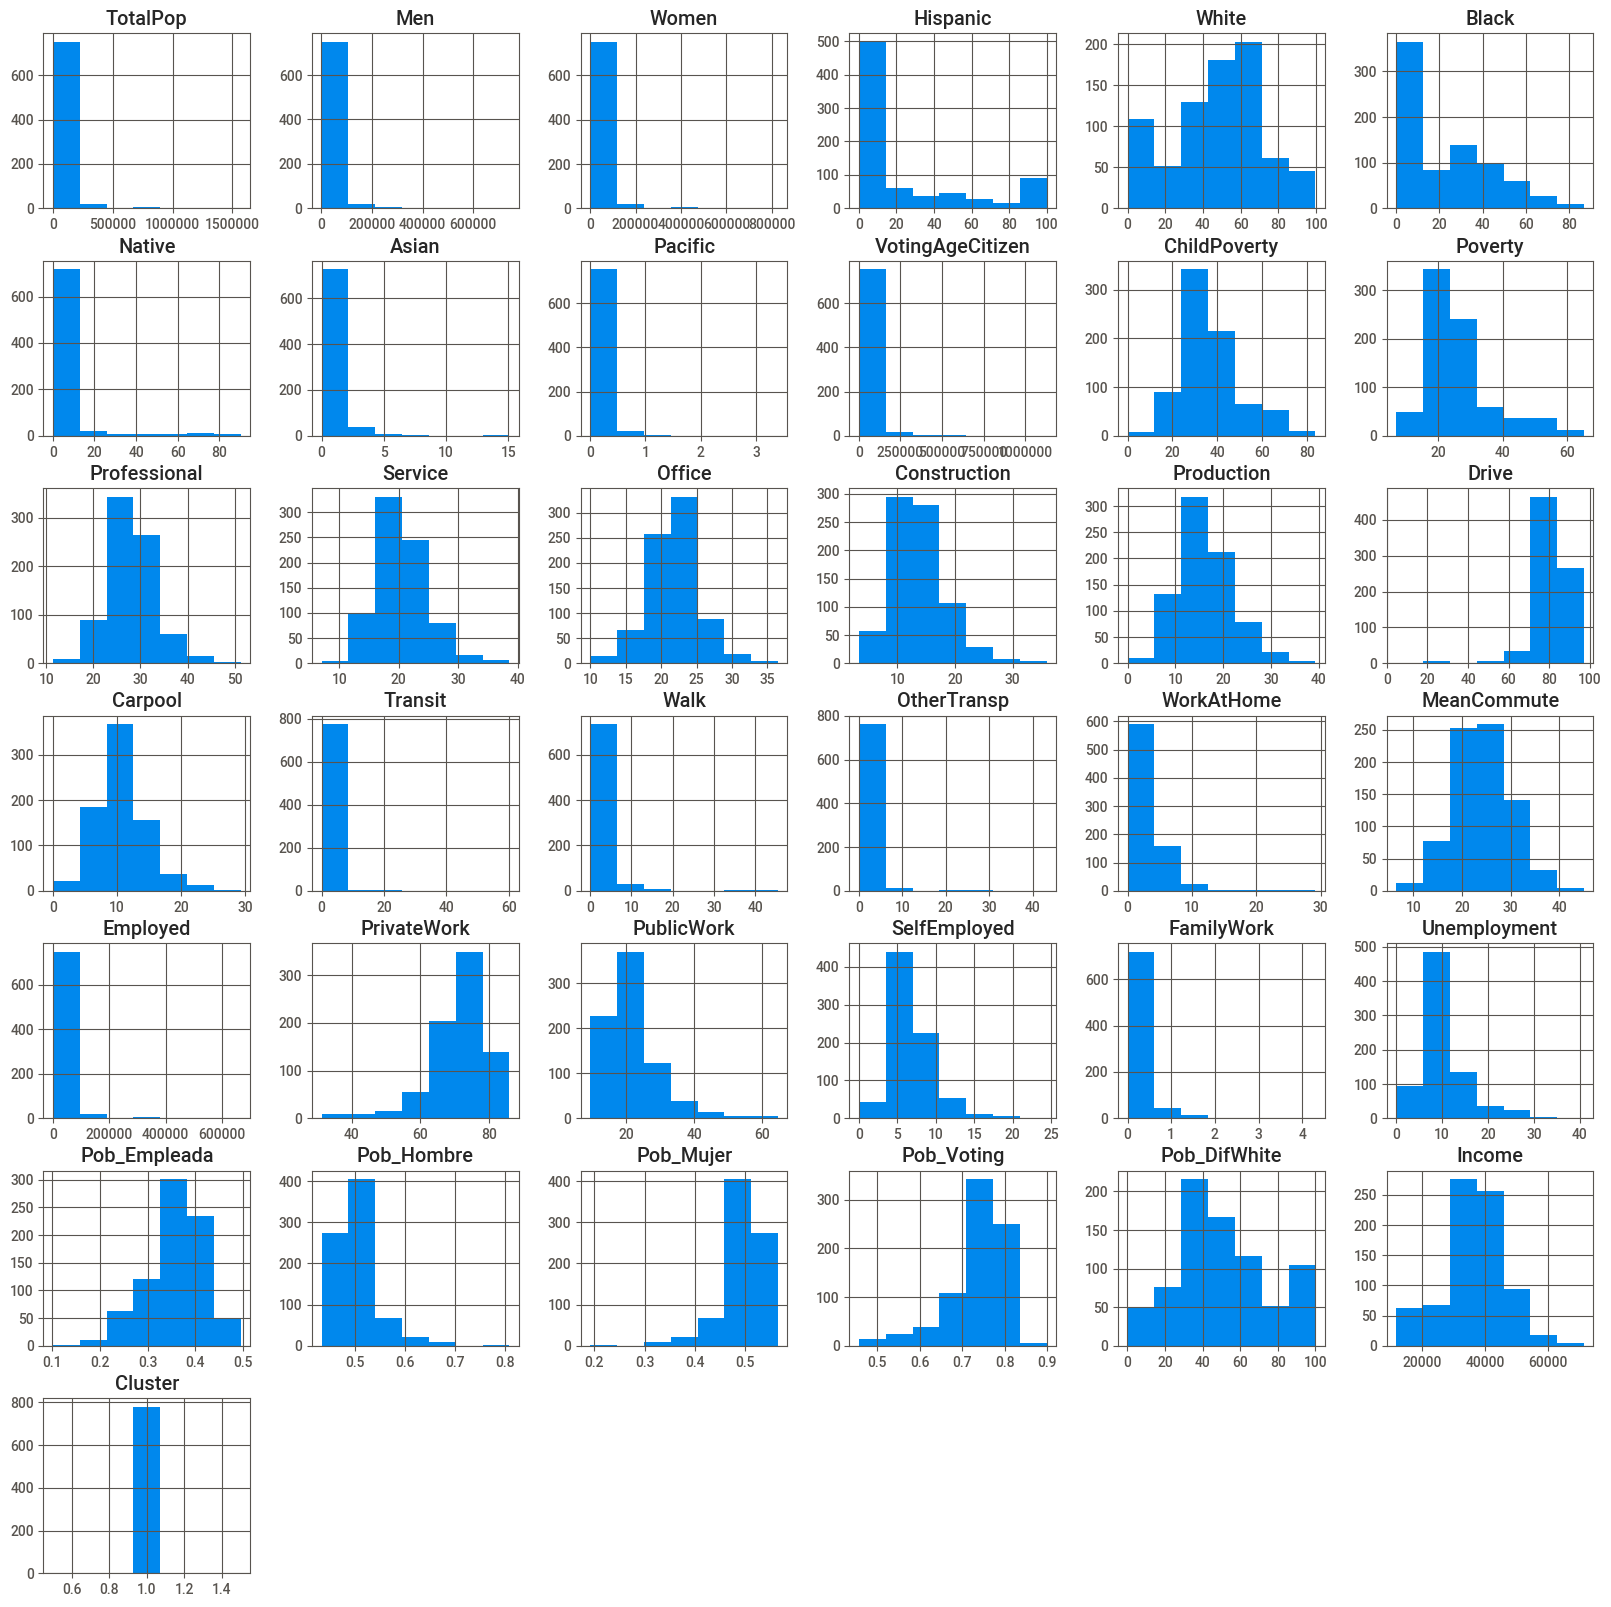

In [30]:
#xy.loc[df['Cluster'] == 0].head()
xy.loc[df['Cluster']==0].hist(figsize=(20,20),xlabelsize=10,ylabelsize=10,bins=7)
xy.loc[df['Cluster']==1].hist(figsize=(20,20),xlabelsize=10,ylabelsize=10,bins=7)
#xy.loc[df['Cluster']==2].hist(figsize=(20,20),xlabelsize=10,ylabelsize=10)
#xy.loc[df['Cluster']==3].hist(figsize=(20,20),xlabelsize=10,ylabelsize=10)
#plt.xlabel('Valores',fontsize=30)
#plt.ylabel('Valores',fontsize=30)
plt.show()

##### En el primer gráfico (Cluster 1 con menor población blanca), se pueden ver ingresos relativamente inferiores, aunque el indicador que mas evidencia muestra de la diferencia entre ambas poblaciones es la pobreza infantil (ChildPoverty), muy marcada en la población con minorías (negros, hispanos, nativos). De igual manera, la tasa de desempleo es mayor en este cluster donde la proporción de población blanca es menor.

In [31]:
df[df['Cluster']==0].describe()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,PublicWork,SelfEmployed,FamilyWork,Unemployment,Pob_Empleada,Pob_Hombre,Pob_Mujer,Pob_Voting,Pob_DifWhite,Cluster
count,2.440000e+03,2.440000e+03,2.440000e+03,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2.440000e+03,...,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.0
mean,1.171565e+05,5.763224e+04,5.952422e+04,7.156230,83.669672,4.561967,1.002172,1.473975,0.091557,8.311313e+04,...,15.536189,8.085861,0.297131,5.505492,0.458505,0.498985,0.501015,0.754513,14.285902,0.0
std,3.649051e+05,1.792479e+05,1.856930e+05,8.797204,13.757080,7.134681,2.876386,3.017019,0.807378,2.369928e+05,...,4.977267,4.060477,0.477943,2.167404,0.053943,0.016901,0.016901,0.046026,13.216415,0.0
min,7.400000e+01,3.900000e+01,3.500000e+01,0.000000,13.300000,0.000000,0.000000,0.000000,0.000000,5.900000e+01,...,4.400000,0.700000,0.000000,0.000000,0.204610,0.418996,0.357974,0.503203,0.000000,0.0
25%,1.156350e+04,5.797250e+03,5.729250e+03,2.000000,77.300000,0.500000,0.100000,0.300000,0.000000,8.848000e+03,...,12.000000,5.400000,0.100000,4.000000,0.421496,0.489759,0.495966,0.735449,4.500000,0.0
50%,2.916050e+04,1.450950e+04,1.464800e+04,3.750000,88.400000,1.500000,0.300000,0.600000,0.000000,2.240550e+04,...,14.600000,7.000000,0.200000,5.500000,0.460448,0.496077,0.503923,0.761306,9.500000,0.0
75%,8.134375e+04,4.064825e+04,4.145300e+04,8.300000,93.900000,5.400000,0.600000,1.400000,0.100000,6.161100e+04,...,17.900000,9.600000,0.300000,6.900000,0.496623,0.504034,0.510241,0.782796,19.900000,0.0
max,1.010572e+07,4.979641e+06,5.126081e+06,67.500000,100.000000,62.300000,50.900000,41.800000,33.700000,6.218279e+06,...,61.900000,38.000000,8.000000,15.300000,0.732558,0.642026,0.581004,0.976744,85.400000,0.0


##### Esta tabla resumen del primer cluster muestra lo que también se pudo validar en las gráficas. En este cluster la población blanca es menor (promedio de 47.6%) y tiene una tasa promedio de desempleo de 10.23%

In [32]:
df[df['Cluster']==1].describe()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,PublicWork,SelfEmployed,FamilyWork,Unemployment,Pob_Empleada,Pob_Hombre,Pob_Mujer,Pob_Voting,Pob_DifWhite,Cluster
count,7.800000e+02,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02,...,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.0
mean,4.950206e+04,24423.182051,25078.880769,24.248462,47.550000,21.570128,4.165385,0.711923,0.057949,3.438543e+04,...,21.934615,6.793205,0.221538,10.294615,0.358893,0.504735,0.495265,0.736553,50.753846,1.0
std,1.214404e+05,58787.190116,62722.408027,32.894291,24.785317,21.681979,13.935205,1.243623,0.192413,7.803856e+04,...,7.755464,2.921378,0.331794,5.167405,0.058727,0.038632,0.038632,0.067701,25.283023,0.0
min,5.640000e+02,280.000000,279.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.960000e+02,...,9.300000,0.000000,0.000000,0.000000,0.101651,0.433661,0.191662,0.456885,0.100000,1.0
25%,1.048250e+04,5346.000000,5170.500000,2.300000,33.600000,0.900000,0.100000,0.100000,0.000000,7.849000e+03,...,16.800000,4.800000,0.000000,7.300000,0.326074,0.482124,0.486483,0.712175,33.850000,1.0
50%,2.079000e+04,10346.500000,10370.000000,5.500000,52.200000,16.400000,0.200000,0.400000,0.000000,1.565650e+04,...,20.400000,6.300000,0.100000,9.200000,0.365529,0.493669,0.506331,0.755286,46.350000,1.0
75%,3.985250e+04,19750.250000,20411.750000,40.725000,63.500000,36.725000,0.700000,0.900000,0.000000,2.972025e+04,...,24.900000,8.000000,0.300000,11.700000,0.400244,0.513517,0.517876,0.778900,65.050000,1.0
max,1.569657e+06,742412.000000,827245.000000,100.000000,99.600000,86.900000,90.300000,15.100000,3.400000,1.128642e+06,...,64.800000,24.400000,4.300000,40.900000,0.495093,0.808338,0.566339,0.899161,100.000000,1.0


##### En este cluster la población blanca es mayoría (promedio de 83.8%) y tiene una tasa promedio de desempleo de 5.5%, casi la mitad de desempleo que tiene el primer cluster (con menor población blanca)

In [33]:
#Imprime los directorios incorporados en el path de python

import sys
print(sys.path)

#Añade el directorio donde se descargó xgboost al path de python

import sys
sys.path.append('c:\\users\\drguz\\appdata\\local\\programs\\python\\python310\\lib\\site-packages')
print(sys.path)


['/home/hughes/Documents/IncomeAnalysis', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/hughes/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages']
['/home/hughes/Documents/IncomeAnalysis', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/hughes/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', 'c:\\users\\drguz\\appdata\\local\\programs\\python\\python310\\lib\\site-packages']


In [34]:
data = [df]

for dataset in data:
    dataset.loc[ dataset['Black'] <= 10, 'Fare'] = 0
    dataset.loc[(dataset['Black'] > 10) & (dataset['Black'] <= 20), 'Black'] = 1
    dataset.loc[(dataset['Black'] > 20) & (dataset['Black'] <= 30), 'Black']   = 2
    dataset.loc[(dataset['Black'] > 30) & (dataset['Black'] <= 40), 'Black']   = 3
    dataset.loc[(dataset['Black'] > 40) & (dataset['Black'] <= 50), 'Black']   = 4
    dataset.loc[(dataset['Black'] > 50) & (dataset['Black'] <= 60), 'Black']   = 5
    dataset.loc[(dataset['Black'] > 60) & (dataset['Black'] <= 70), 'Black']   = 6
    dataset.loc[(dataset['Black'] > 70) , 'Black']   = 7
   
    dataset['Fare'] = dataset['Fare'].astype(int)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
from scipy import stats

# calculate z-scores
z_scores = stats.zscore(x)

# identify outliers
outliers = x[(z_scores > 3).any(axis=1)]
print(outliers)